# Homework 5
## Due Nov. 20

## 1. Principal Components Analysis (40 pts)

In class, we explored the concept of eigendigits, which were a more information-rich basis for representing the handwritten digits of the MNIST dataset (see course lecture notes 12).  In fact, a similar procedure can be performed for any standardized images dataset.  In this problem, we will find so-called *eigenfaces*, which are pretty much as they sound: the principal components of a face dataset.  The faces that we will use can be found in the so-called 'labelled faces in the wild' data set.  This can be downloaded via the scikit-learn module as follows:

In [271]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from sklearn.datasets import fetch_lfw_people

# Download labelled faces in the wild (only examples for which there are more than 50 examples)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.7)

# Interrogate the data for the size of the images (h,w) 
m, h, w = lfw.images.shape
print(lfw.images.shape)

# For our purposes, as in MNIST, we will use a flattened version of the pixels
X = lfw.data
print(X.shape)
n = X.shape[1]

y = lfw.target

(1560, 87, 65)
(1560, 5655)


Since the second problem in this homework deals with classification, let's split the LFW data into a training and test dataset.

In [272]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

### 1.1
Using either your own implementation or the implementation given by scikit-learn, **perform a principal components analysis on the LFW data, retaining sufficient components to explain 95% of the total data variance (10pts).**  To prove that your PCA is successfully capturing this level of variability, **Generate a scree plot showing the cumulative explained variance as a function of number of principal components (10pts).**

<IPython.core.display.Javascript object>


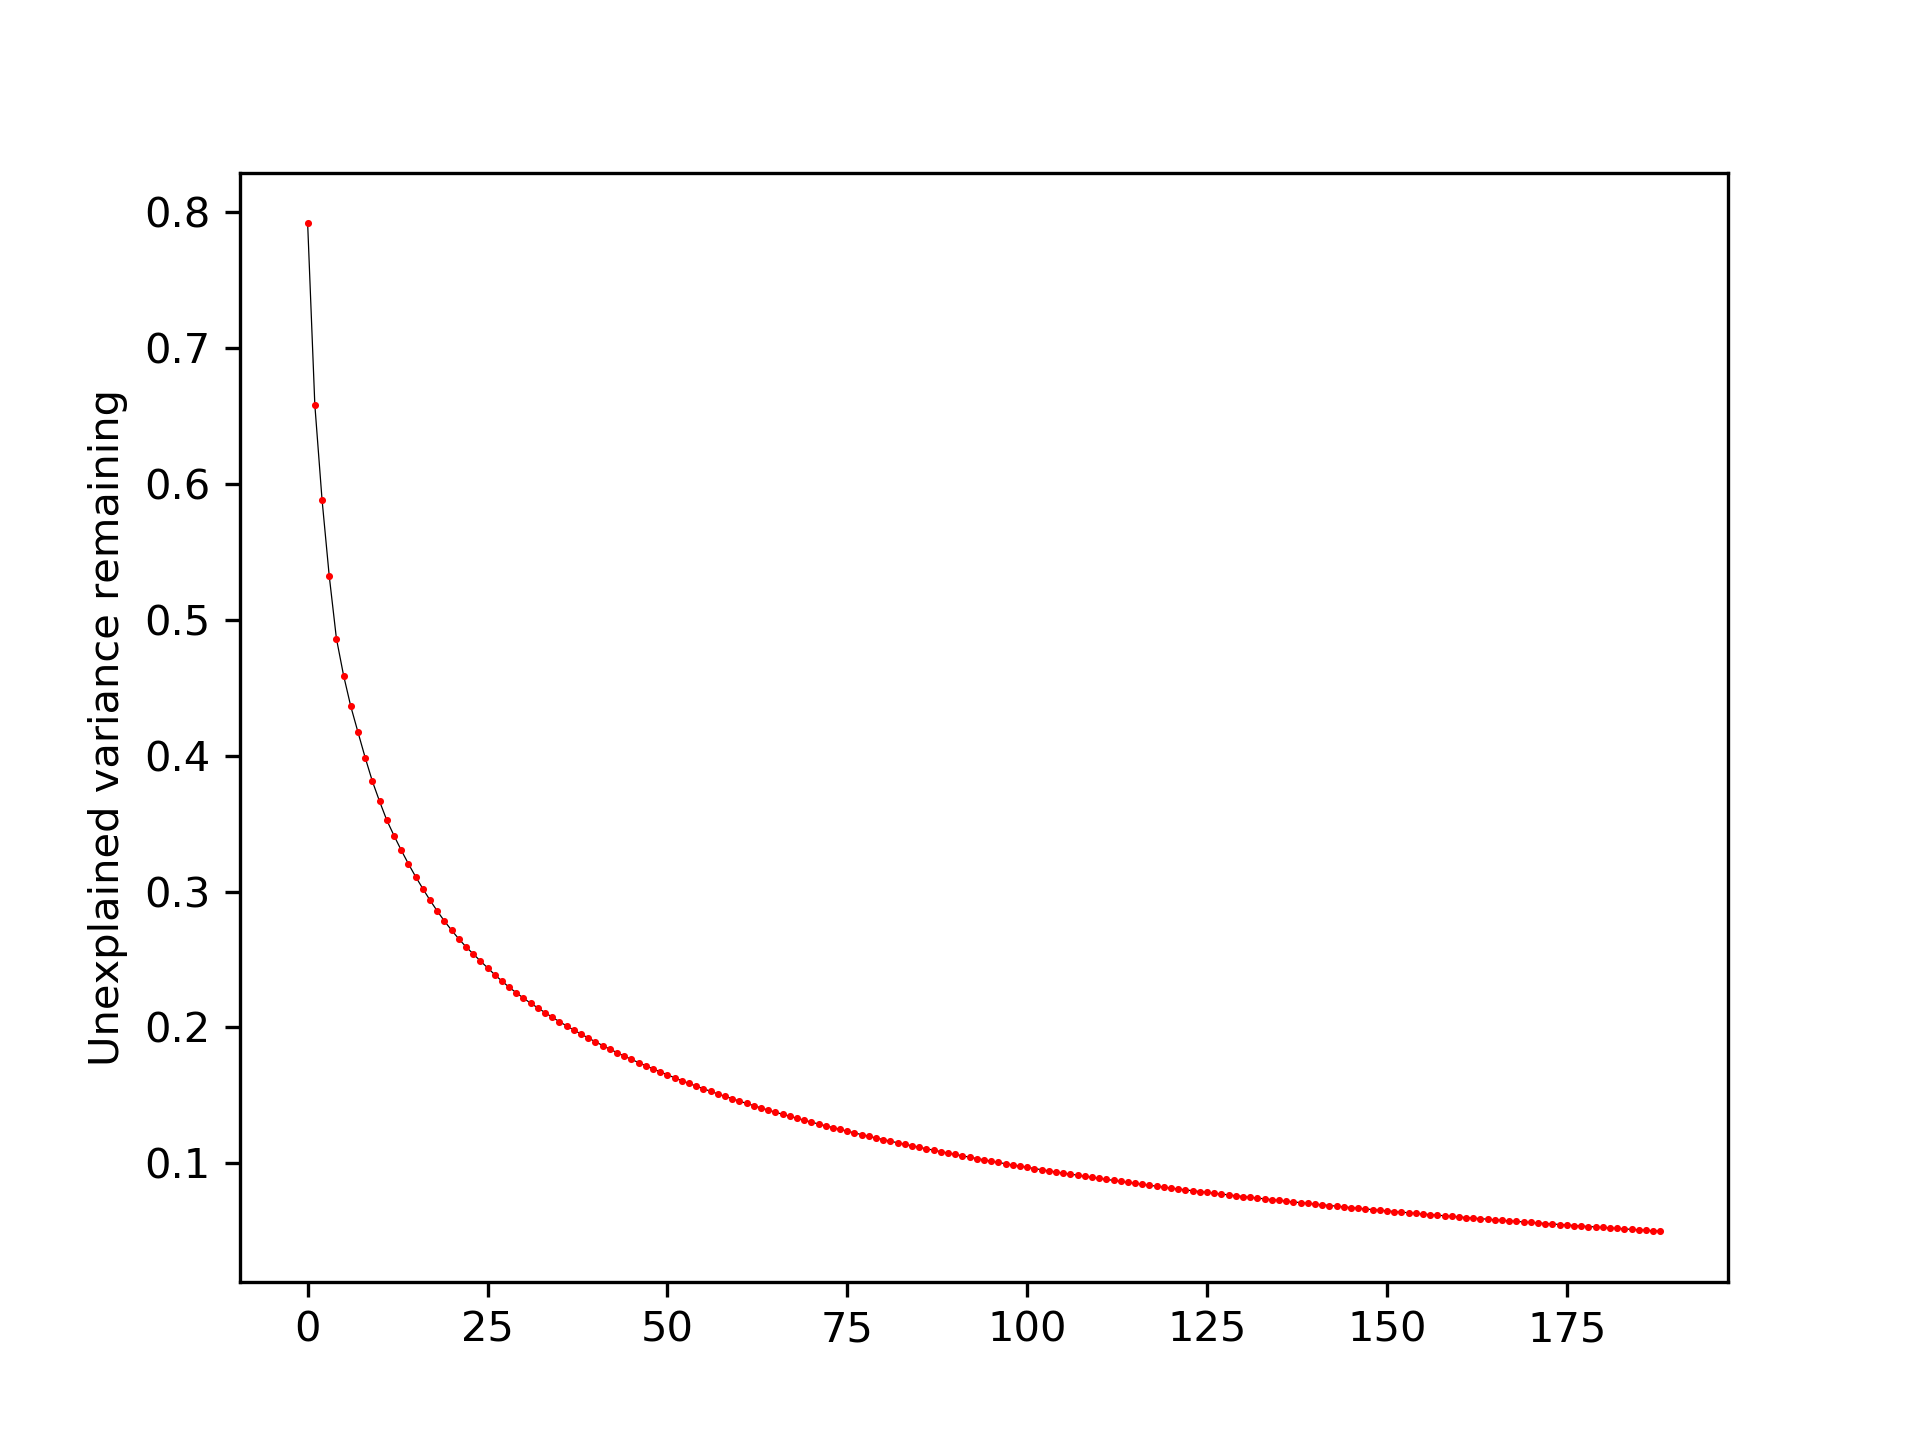

Explained Variance: 0.9500072
Percentage kept for pca: 12.12%


In [273]:
from sklearn import decomposition

pca = decomposition.PCA(0.95, copy=True,whiten=False)
pca.fit(lfw.data)
x = pca.transform(lfw.data)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(1-cumulative_variance_ratio, 'k-',linewidth=0.3)
plt.plot(1-cumulative_variance_ratio, 'ro',markersize=0.7)
plt.ylabel('Unexplained variance remaining')
plt.show()

print('Explained Variance:', cumulative_variance_ratio[len(cumulative_variance_ratio)-1])
print('Percentage kept for pca: %.2f%%' % (len(cumulative_variance_ratio)/len(lfw.data)*100))

### 1.2
**Visualize the first five eigenfaces by reshaping the resulting principal components into images and plotting them (10pts).**

<IPython.core.display.Javascript object>


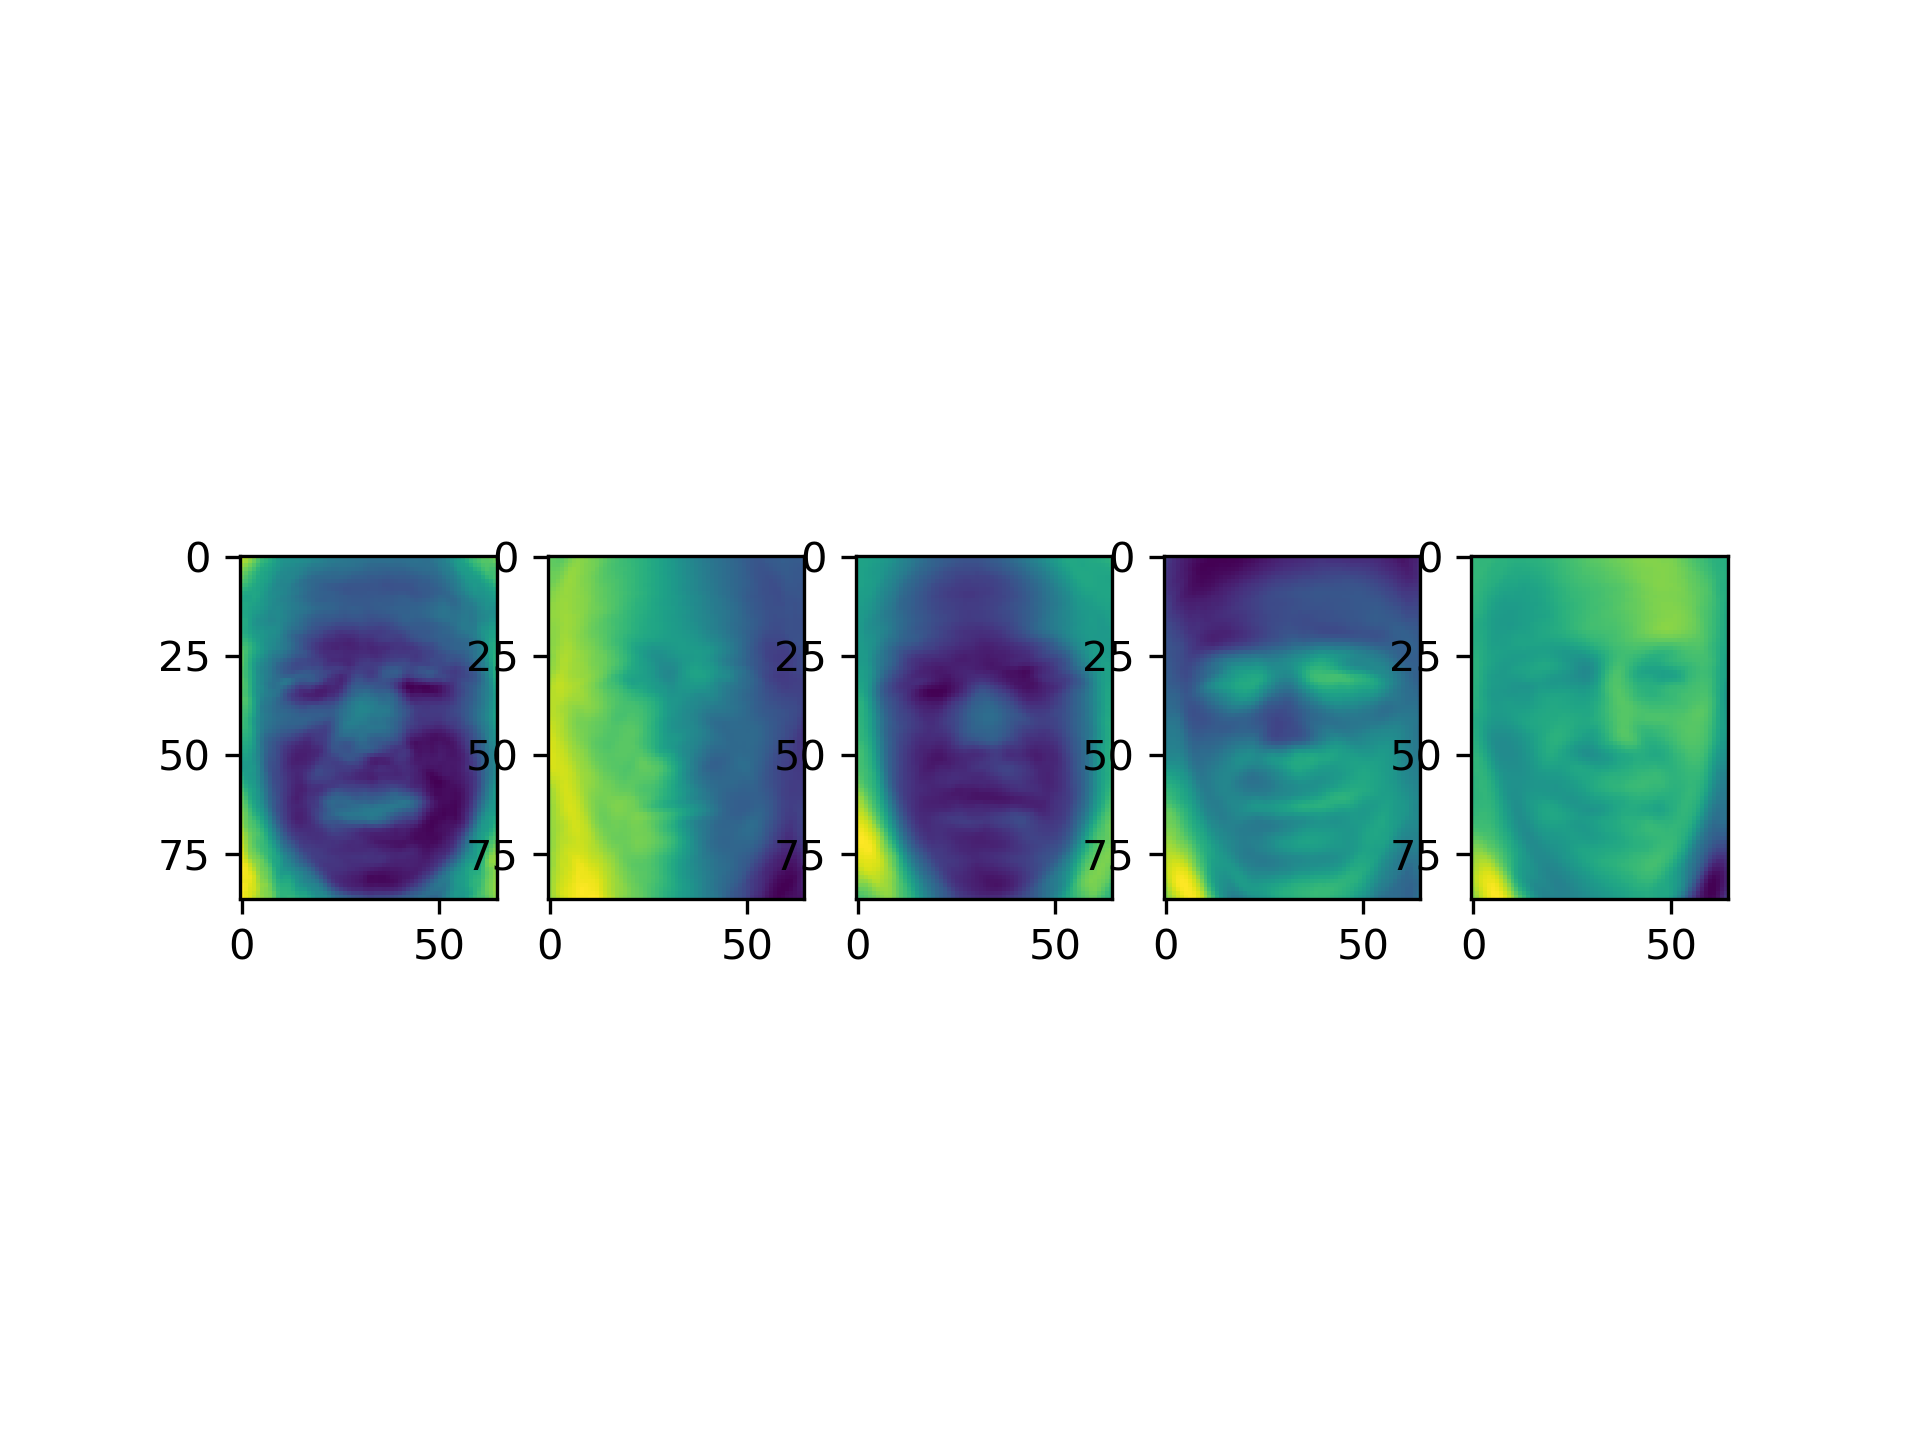

<IPython.core.display.Javascript object>


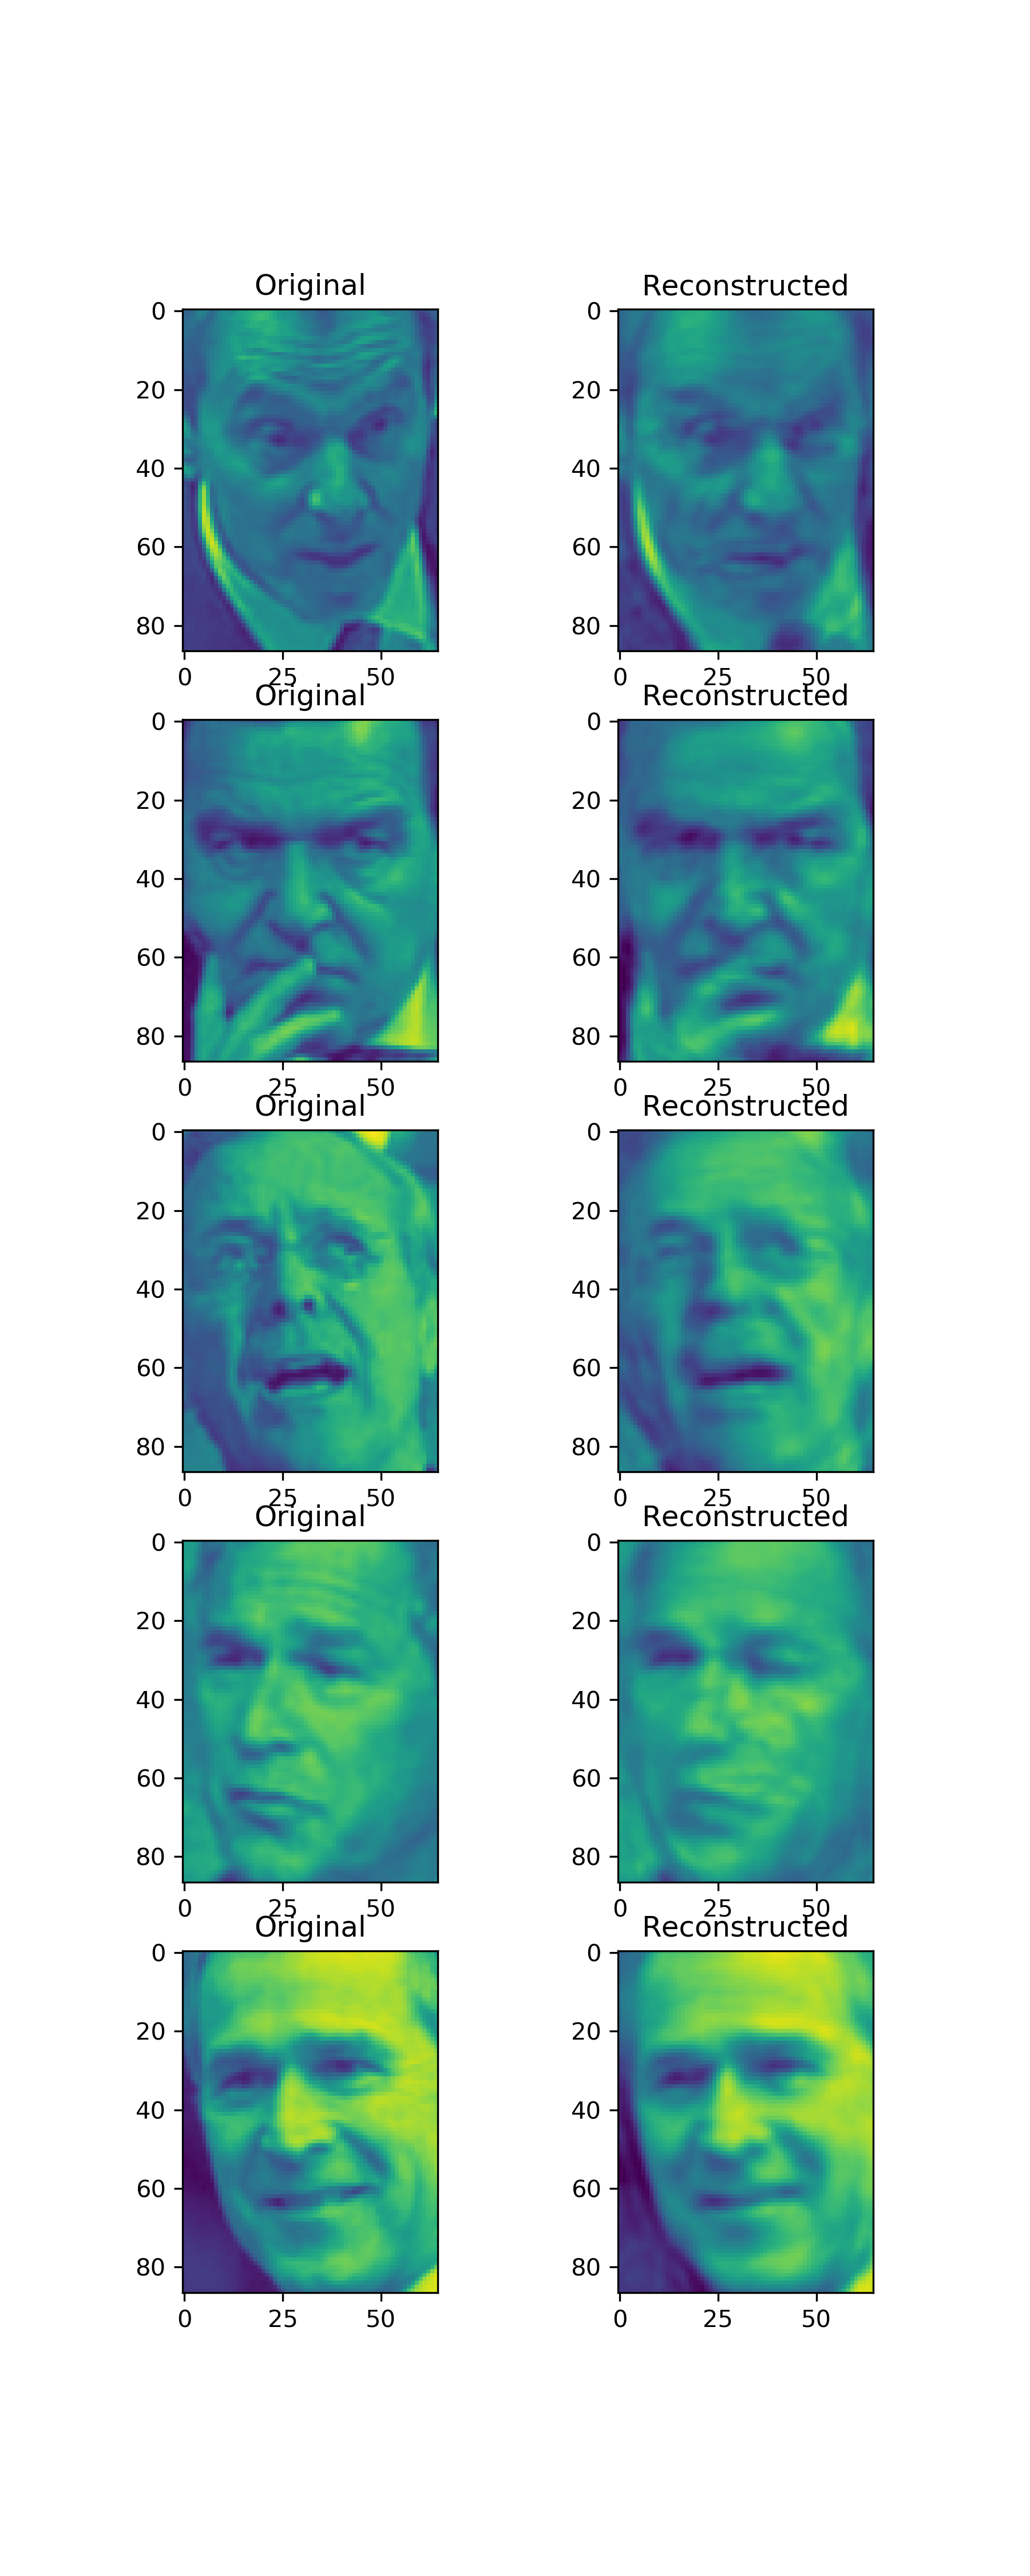

In [274]:
fig, axs = plt.subplots(nrows=1,ncols=5)
counter = 0
for ax in axs:
        ax.imshow(pca.components_[counter,:].reshape((h,w)))
        counter += 1
plt.show()


# Test to see how the eigenfaces do at reconstructing the true image
fig,axs = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(6,15)

n_components = len(cumulative_variance_ratio)

for i in range(5):
    X_reconstructed = 0
    counter = 0 
    data_index = i
    for c,l in zip(pca.components_,x[data_index]):
        if counter<n_components:
            X_reconstructed += c*l
        counter += 1
    X_reconstructed += pca.mean_
    X_reconstructed = X_reconstructed.reshape((h,w))

    axs[i,0].imshow(lfw.data[data_index,:].reshape((h,w)),vmin=0,vmax=255)
    axs[i,0].set_title("Original")
    axs[i,1].imshow(X_reconstructed,vmin=0,vmax=255)
    axs[i,1].set_title("Reconstructed")
plt.show()

### 1.3 (Turn in the following question on Moodle)
(10pts) Consider the following two datasets (X_1 and X_2), each with three dimensions.  How many principal components do you expect each to have?  How do you know?

<IPython.core.display.Javascript object>


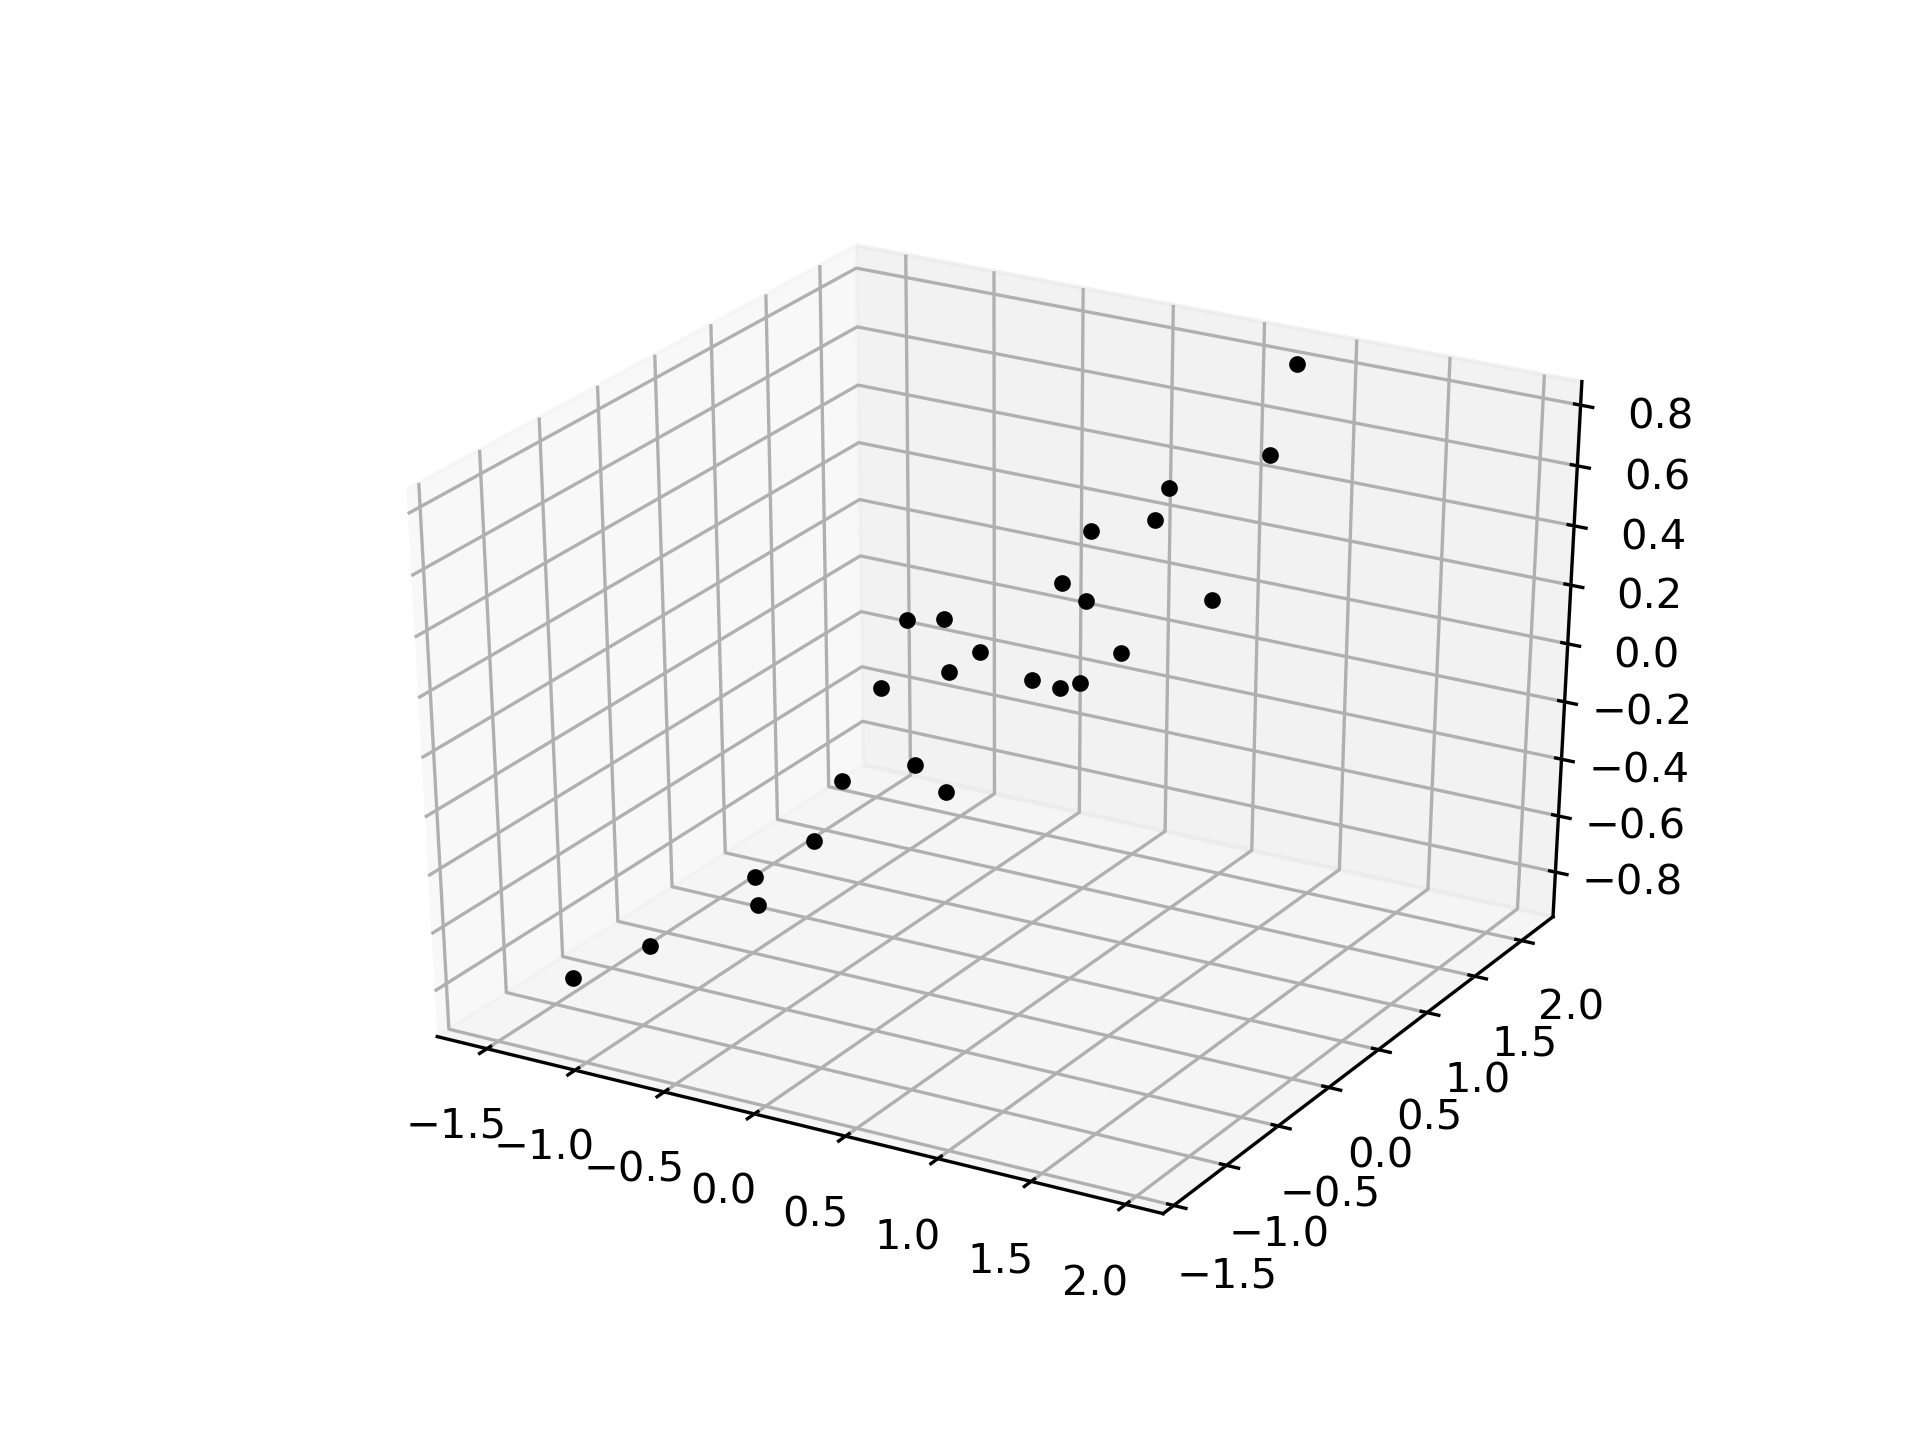

<IPython.core.display.Javascript object>


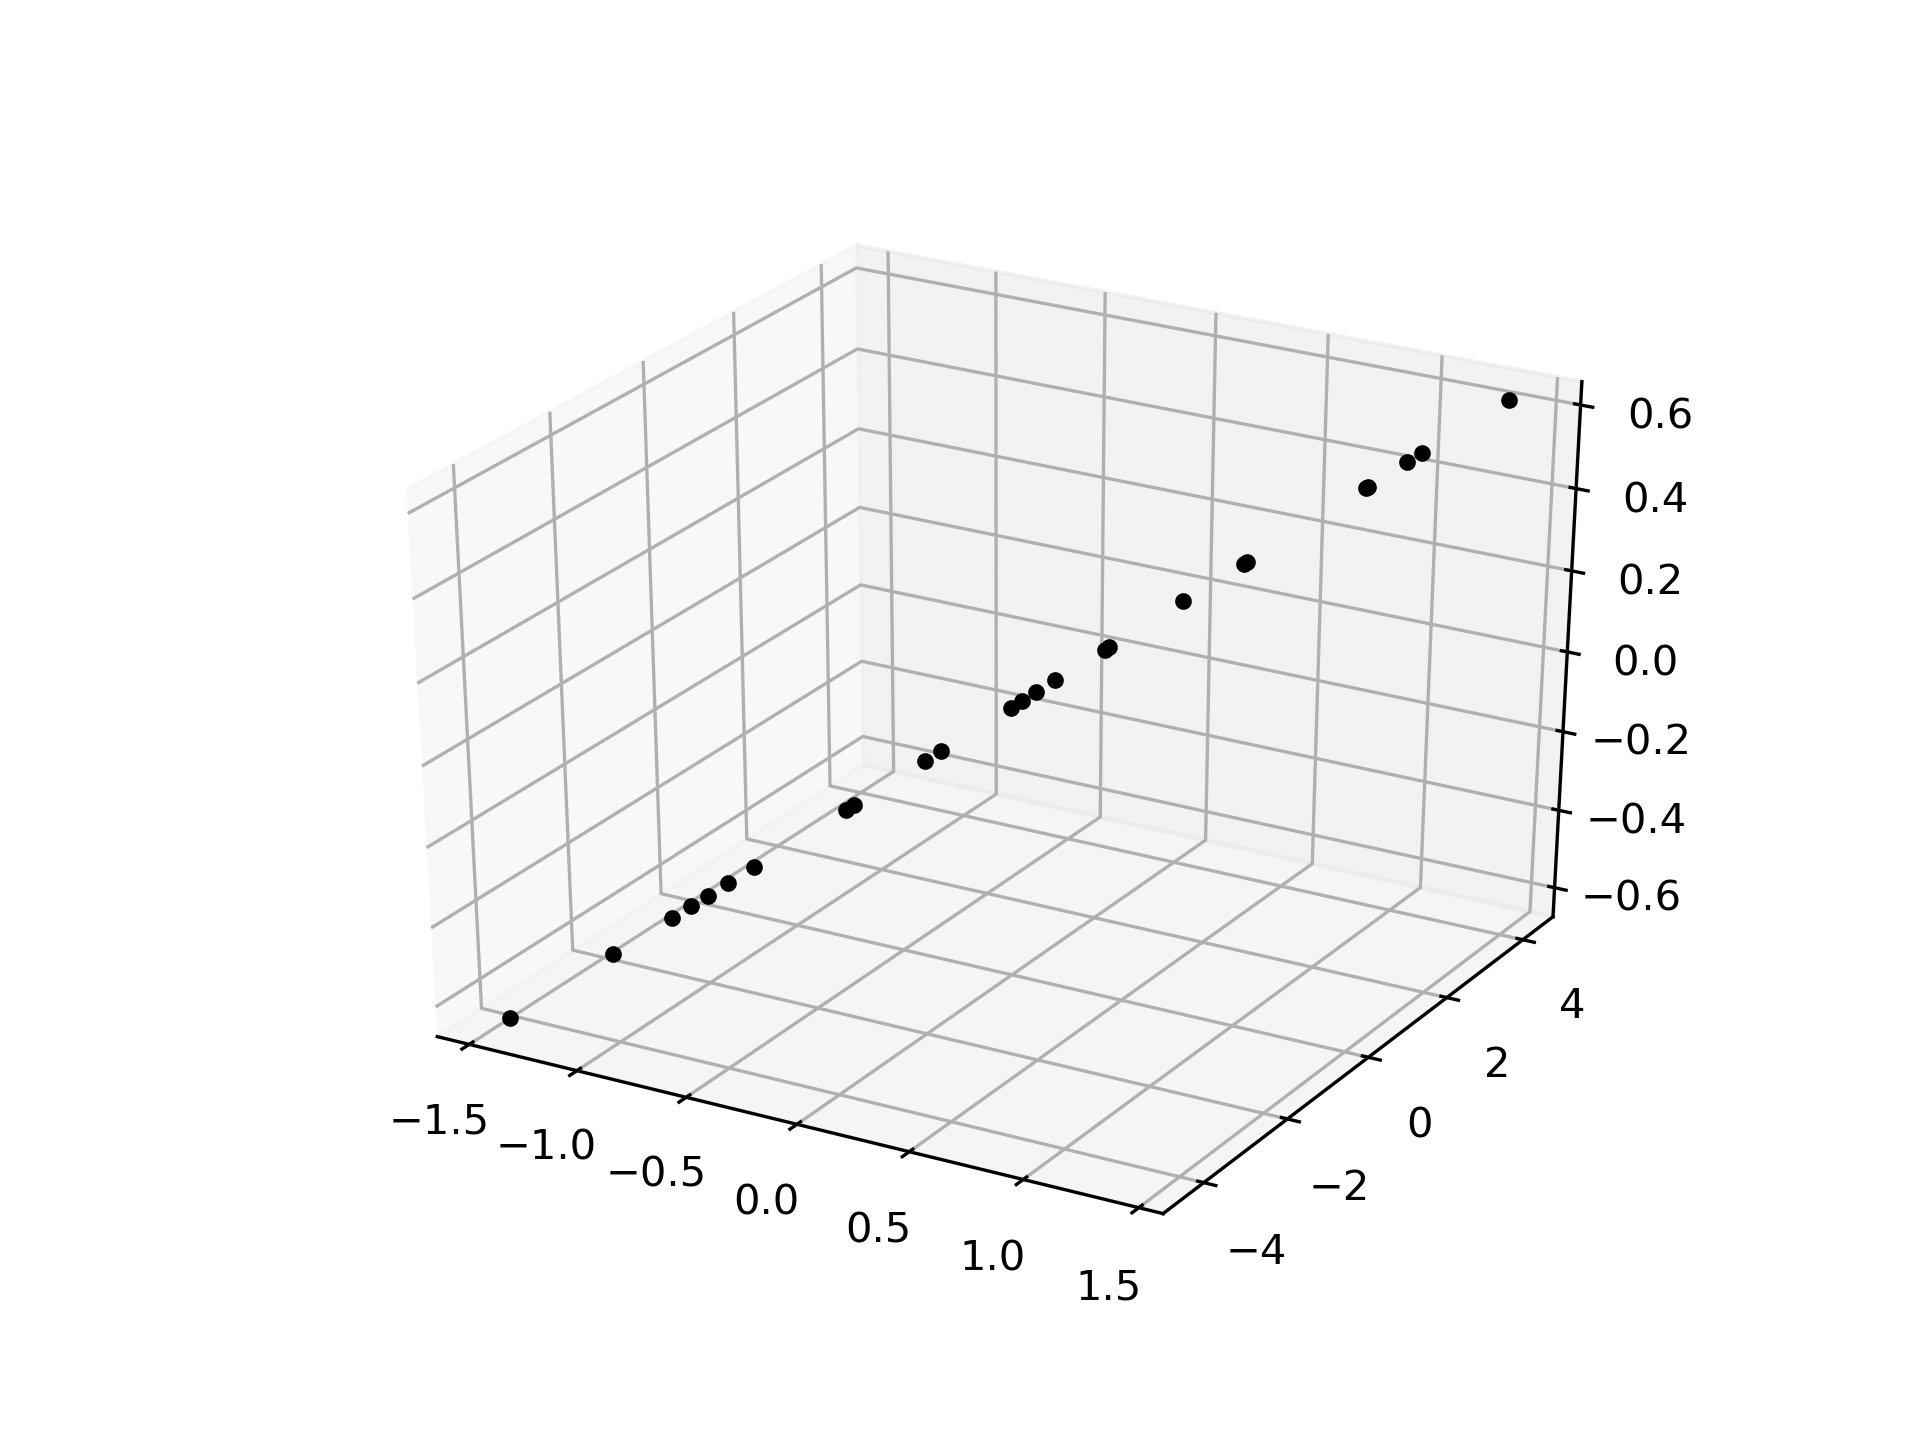

In [266]:
# Rerunning this seems to cause glitches later

X_1 = np.array([[ 0.24658525,  0.846718  ,  0.29263623],
       [ 1.94365644, -0.78759333,  0.81430956],
       [ 0.54530612,  1.33540717,  0.53973449],
       [ 0.08287299,  1.41172682,  0.32378186],
       [ 1.16505735, -0.76913387,  0.4287019 ],
       [ 0.80324671, -0.3969266 ,  0.32223804],
       [ 0.30891776, -0.62816207,  0.02882647],
       [ 0.68643482,  0.95395446,  0.5340083 ],
       [-1.1862806 ,  1.80433744, -0.23227281],
       [ 1.31814933, -0.86135592,  0.48680348],
       [-0.01355747,  0.52411544,  0.09804436],
       [-0.94016758, -1.00530368, -0.67114452],
       [-1.53088917, -0.79227508, -0.9238996 ],
       [ 0.87683622, -1.29639414,  0.17913928],
       [-0.34180964, -0.21053314, -0.21301145],
       [-0.40673884, -0.89787012, -0.38294344],
       [-0.74792211,  1.42602549, -0.08875596],
       [-0.10994822, -1.34930993, -0.3248361 ],
       [-0.09104714, -0.87550541, -0.22062465],
       [-0.18231387,  0.51312677,  0.01146842],
       [ 1.48119305, -0.77899653,  0.58479722],
       [ 0.67944609,  0.31732884,  0.40318881],
       [ 0.8137745 ,  2.09032765,  0.82495278],
       [-0.81678612,  0.9302194 , -0.22234918],
       [ 1.32824051,  0.88054246,  0.84022875]])

X_2 = np.array([[ 9.97897650e-01,  2.99369295e+00,  4.49053943e-01],
       [-9.19396971e-01, -2.75819091e+00, -4.13728637e-01],
       [ 2.63408733e-01,  7.90226199e-01,  1.18533930e-01],
       [ 1.23229118e-01,  3.69687353e-01,  5.54531030e-02],
       [ 1.00365433e+00,  3.01096300e+00,  4.51644450e-01],
       [-9.73346396e-01, -2.92003919e+00, -4.38005878e-01],
       [-2.48058203e-01, -7.44174610e-01, -1.11626192e-01],
       [-1.14257767e+00, -3.42773300e+00, -5.14159949e-01],
       [-4.51139403e-01, -1.35341821e+00, -2.03012732e-01],
       [-2.01440713e-01, -6.04322138e-01, -9.06483206e-02],
       [ 1.15492027e+00,  3.46476081e+00,  5.19714121e-01],
       [ 6.86908285e-02,  2.06072486e-01,  3.09108728e-02],
       [-4.73749885e-01, -1.42124965e+00, -2.13187448e-01],
       [ 1.11404171e+00,  3.34212513e+00,  5.01318770e-01],
       [-8.13230322e-01, -2.43969096e+00, -3.65953645e-01],
       [-8.70193912e-01, -2.61058174e+00, -3.91587261e-01],
       [ 6.55592608e-01,  1.96677783e+00,  2.95016674e-01],
       [ 2.88671096e-02,  8.66013288e-02,  1.29901993e-02],
       [ 6.64698327e-01,  1.99409498e+00,  2.99114247e-01],
       [ 4.83556414e-01,  1.45066924e+00,  2.17600386e-01],
       [ 2.74450530e-01,  8.23351591e-01,  1.23502739e-01],
       [-2.38147337e-03, -7.14442010e-03, -1.07166302e-03],
       [ 1.39721186e+00,  4.19163557e+00,  6.28745336e-01],
       [-1.44265778e+00, -4.32797333e+00, -6.49196000e-01],
       [-7.39010087e-01, -2.21703026e+00, -3.32554539e-01]])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*X_1.T,'k.')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*X_2.T,'k.')


## 2. Logistic (actually Softmax) Regression (30pts)

To explore the use of logistic regression, we will again use labelled faces in the wild.  For this problem, fit the PCA-transformed training data using a logistic regression model.  To begin with you'll need to transform both the test and training datasets into the PCA basis.

In [275]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Now that we have our transformed features, we can implement logistic regression.  Rather than come up with our own, let's use the sklearn implementation, which is quite good:

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix

### 2.1
Before you begin, there are a few keyword arguments that you will want to provide to this function.  First, you'll want to give it the command multi_class='multinomial'.  This causes the classifier to perform true softmax regression, rather than a strange n-fold 1-vs-many binary logistic regression scheme.  Second, you should set the keyword argument to solver='lbfgs'.  **Fit a logistic regression model to your training data** 

In [277]:
lm = LogisticRegression(solver='lbfgs',multi_class='multinomial')
lm.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### 2.2
**After fitting your model, classify the test set, and print a confusion matrix and the overall accuracy**

In [278]:
y_test_pred = lm.predict(X_test_pca)
c = confusion_matrix(y_test,y_test_pred)
accuracy = np.diagonal(c).sum()/c.sum()
print("Confusion matrix: \n", c)
print("Classification accuracy: ", accuracy)


Confusion matrix: 
 [[ 18   1   0   0   0   0   1   2   0   0   1   1]
 [  5  61   5   5   1   2   2   1   2   0   2   3]
 [  0   6  28   5   0   2   1   1   0   0   1   1]
 [  1   5   8 127   3   5   1   1   1   2   2   3]
 [  1   0   1   3  25   2   1   2   0   0   0   2]
 [  0   0   0   1   4  22   0   0   0   0   1   2]
 [  1   0   2   1   0   4   6   1   0   0   0   1]
 [  0   0   1   1   0   0   0  14   0   0   0   0]
 [  0   2   0   1   0   0   0   0  13   2   0   2]
 [  0   3   0   1   0   0   0   0   1  15   0   0]
 [  0   3   0   0   0   0   0   0   1   0  12   0]
 [  0   1   2   3   1   0   0   0   1   0   1  34]]
Classification accuracy:  0.7281553398058253


### 2.3
By default, sklearn applies regularization to this problem, penalizing large parameter values.  You can control the degree of regularization by using the C=1e-4 keyword argument (or C=1e-6 or whatever).  However, it is not always clear what the best regularization should be.  To deal with this problem, sklearn offers the function LogisticRegressionCV, which automatically runs [k-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation) on a user-specified range of regularization parameters, and selects the one which minimizes the classification error.  Otherwise, it works just like LogisticRegression.  ***Use this function to determine the optimal value of the regularization parameter C, and report your classification accuracy with this new value.  Does regularization appreciably improve your classification accuracy? *** 

*HINT 1: A good range to check over is from $C=1$ to $C=10^{-11}$.  You'll want the regularization values that you test to be distributed logarithmically, e.g. via the numpy logspace command.*  

In [279]:
c_vals = np.logspace(-11,1)
print(c_vals)
clf = LogisticRegressionCV(Cs=c_vals, multi_class='multinomial').fit(X_train_pca,y_train)

# Check the value of C
C = clf.C_[0]
print('\nC value:',C)

lm = LogisticRegression(C=C,solver='lbfgs',multi_class='multinomial')
lm.fit(X_train_pca,y_train)

y_test_pred = lm.predict(X_test_pca)
c = confusion_matrix(y_test,y_test_pred)
accuracy = np.diagonal(c).sum()/c.sum()
print("\nConfusion matrix: \n", c)
print("Classification accuracy: ", accuracy)

[1.00000000e-11 1.75751062e-11 3.08884360e-11 5.42867544e-11
 9.54095476e-11 1.67683294e-10 2.94705170e-10 5.17947468e-10
 9.10298178e-10 1.59985872e-09 2.81176870e-09 4.94171336e-09
 8.68511374e-09 1.52641797e-08 2.68269580e-08 4.71486636e-08
 8.28642773e-08 1.45634848e-07 2.55954792e-07 4.49843267e-07
 7.90604321e-07 1.38949549e-06 2.44205309e-06 4.29193426e-06
 7.54312006e-06 1.32571137e-05 2.32995181e-05 4.09491506e-05
 7.19685673e-05 1.26485522e-04 2.22299648e-04 3.90693994e-04
 6.86648845e-04 1.20679264e-03 2.12095089e-03 3.72759372e-03
 6.55128557e-03 1.15139540e-02 2.02358965e-02 3.55648031e-02
 6.25055193e-02 1.09854114e-01 1.93069773e-01 3.39322177e-01
 5.96362332e-01 1.04811313e+00 1.84206997e+00 3.23745754e+00
 5.68986603e+00 1.00000000e+01]

C value: 7.543120063354607e-06

Confusion matrix: 
 [[ 18   1   0   0   0   1   1   2   0   0   0   1]
 [  5  72   3   3   0   1   1   1   0   1   0   2]
 [  2   3  30   5   2   1   0   0   1   0   0   1]
 [  0   3   5 131   5   5   2 

Classification accuracy does seem to improve by approximately 2-3% using this new C value.

## 3. This time in color (20 pts)(GRAD STUDENTS ONLY)

In the above two problems, we ignored one of the feature dimensions: color.  In fact, every element of the LFW dataset is a color image (previously we averaged the bands).  Rerun the above process of performing a PCA and classifying via logistic regression, but this time import the data using

In [280]:
# Download labelled faces in the wild (only examples for which there are more than 50 examples)
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.7, color=True)

You will have to modify your code to account for data with different dimensions.  You will also have to think a bit about how to display principal component arrays, since when displaying a 3-band image matplotlib will expect 8 bit integer arrays.  **Can you achieve better classification accuracy using the color dataset?**

In [281]:
# Interrogate the data for the size of the images (h,w) 
print(lfw.images.shape)
m, h, w, z = lfw.images.shape

# Use flattened array of the pixels
X = lfw.data
X = X/255.0
n = X.shape[1]

y = lfw.target

# Create the training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Perform the PCA decomposition to retain explain at least 95% variance
pca = decomposition.PCA(0.95, copy=True,whiten=False)
pca.fit(X)
x = pca.transform(X)

# # Make a scree plot of the variance # Not functioning properly.
# cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# vals = [1-x for x in cumulative_variance_ratio]
# plt.plot(vals, 'k-',linewidth=0.3)
# plt.plot(vals, 'ro',markersize=0.7)
# plt.ylabel('Unexplained variance remaining')
# plt.show()

print('Explained Variance:', cumulative_variance_ratio[len(cumulative_variance_ratio)-1])
print('Percentage kept for pca: %.2f%%' % (len(cumulative_variance_ratio)/len(lfw.data)*100))

(1560, 87, 65, 3)
Explained Variance: 0.9500072
Percentage kept for pca: 12.12%


<IPython.core.display.Javascript object>


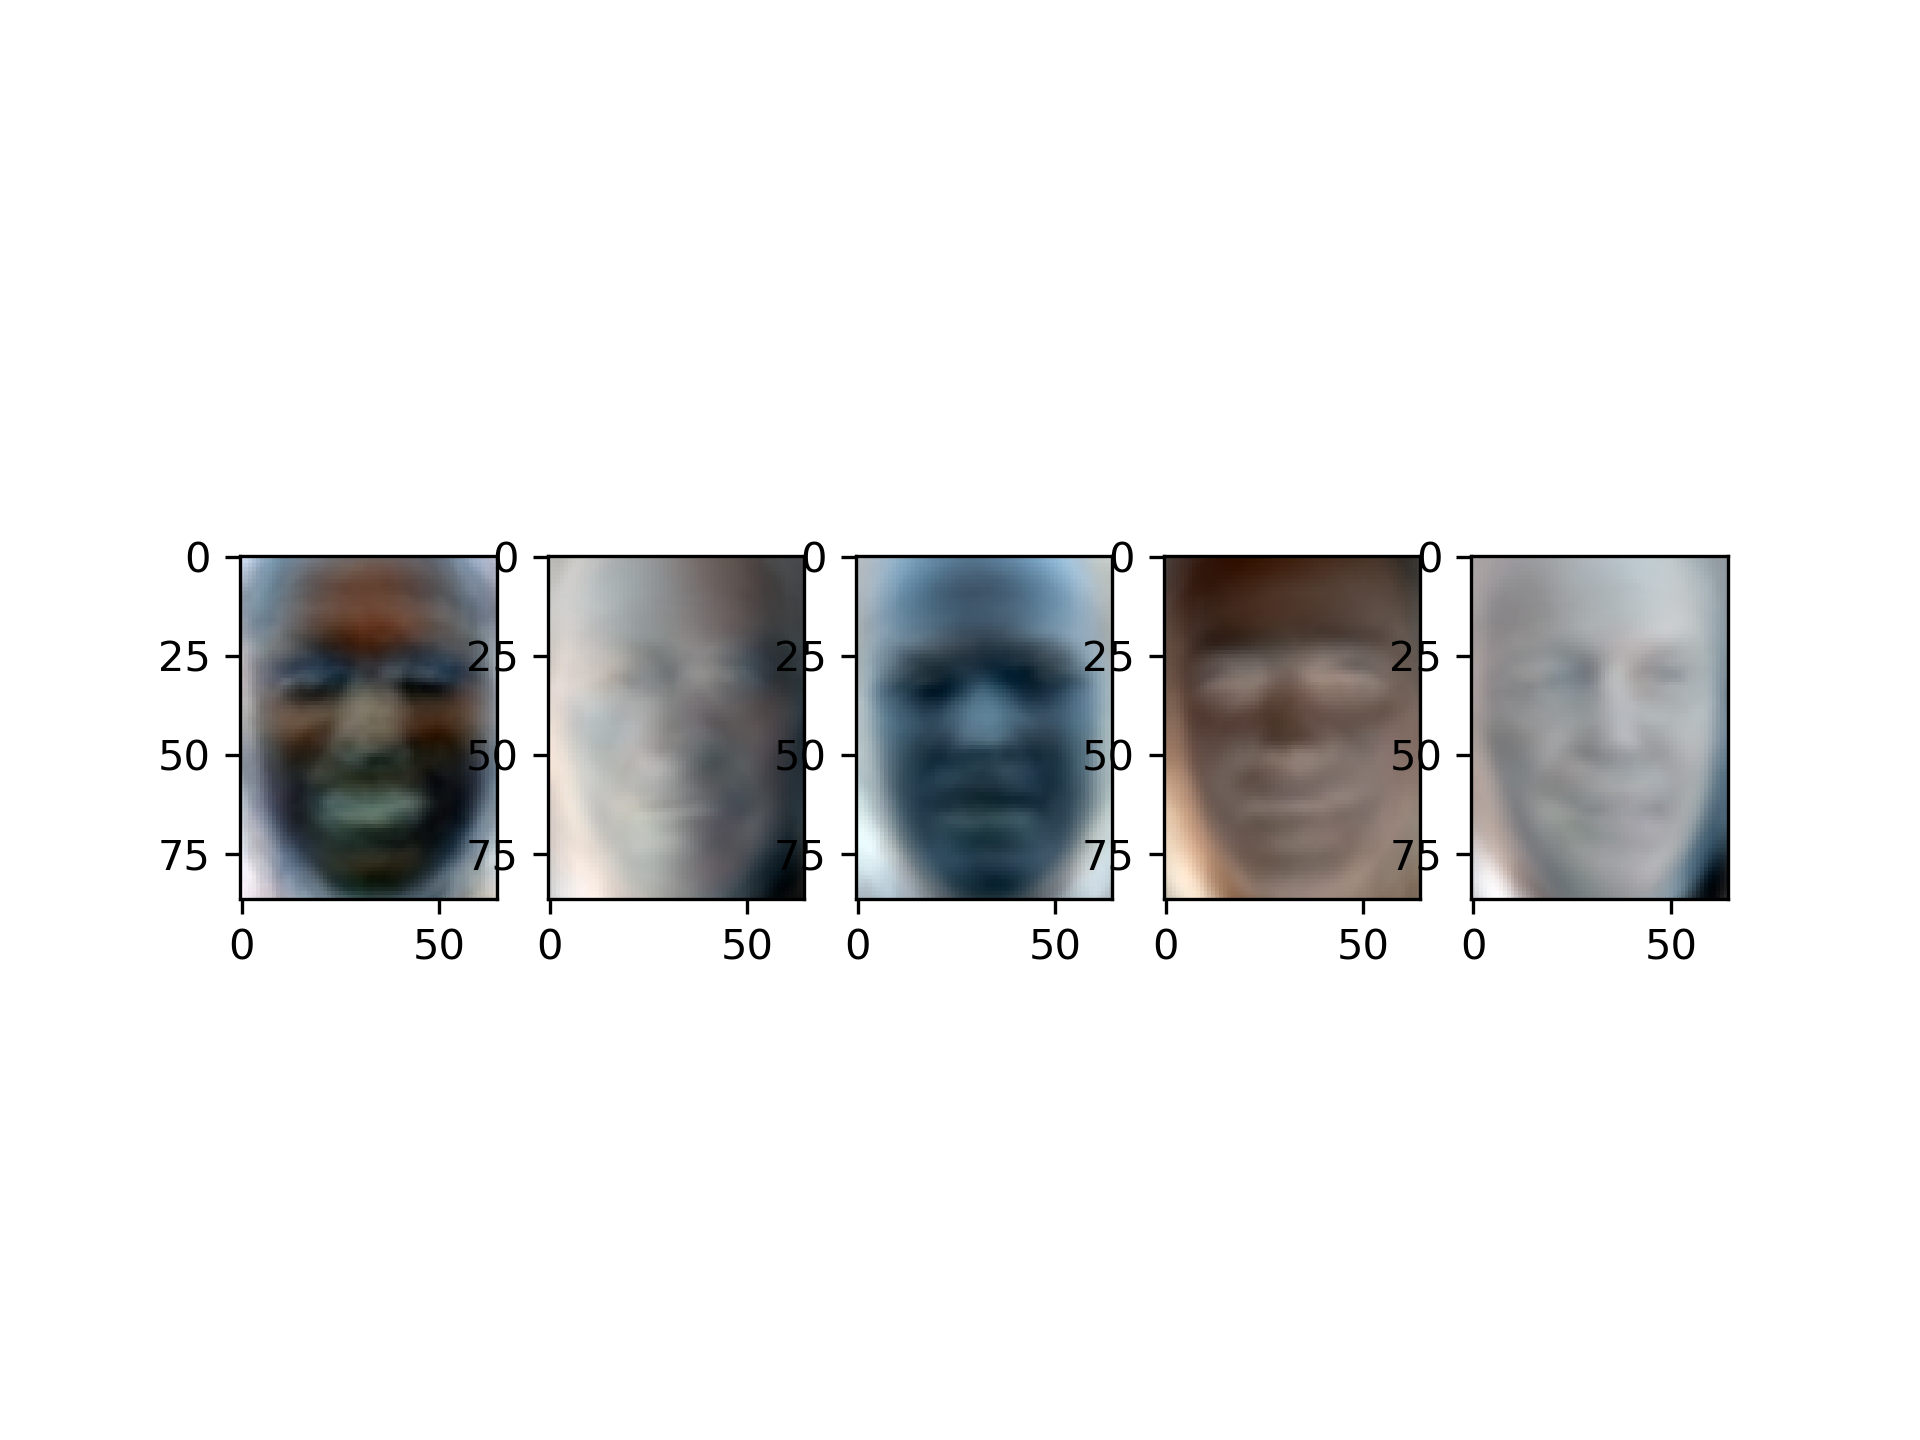

In [268]:
# Show the eigenfaces (IN COLOR!)

fig, axs = plt.subplots(nrows=1,ncols=5)
counter = 0

for ax in axs:
        img = pca.components_[counter,:].reshape((h,w,z)) # Grab next face
        
        # I believe this method assumes a rgb value of 0 and 255 were
        # originally present so this might not be 100% accurate. Maybe 
        # create a dummy pixel that will guarantee to have the min and
        # max go through the transformation.
        
        min_val = np.min(img)
        max_val = np.max(img)
        img = (img - min_val)/(max_val - min_val) # Normalize rgb values
        
        ax.imshow(img)
        counter += 1
plt.show()


<IPython.core.display.Javascript object>


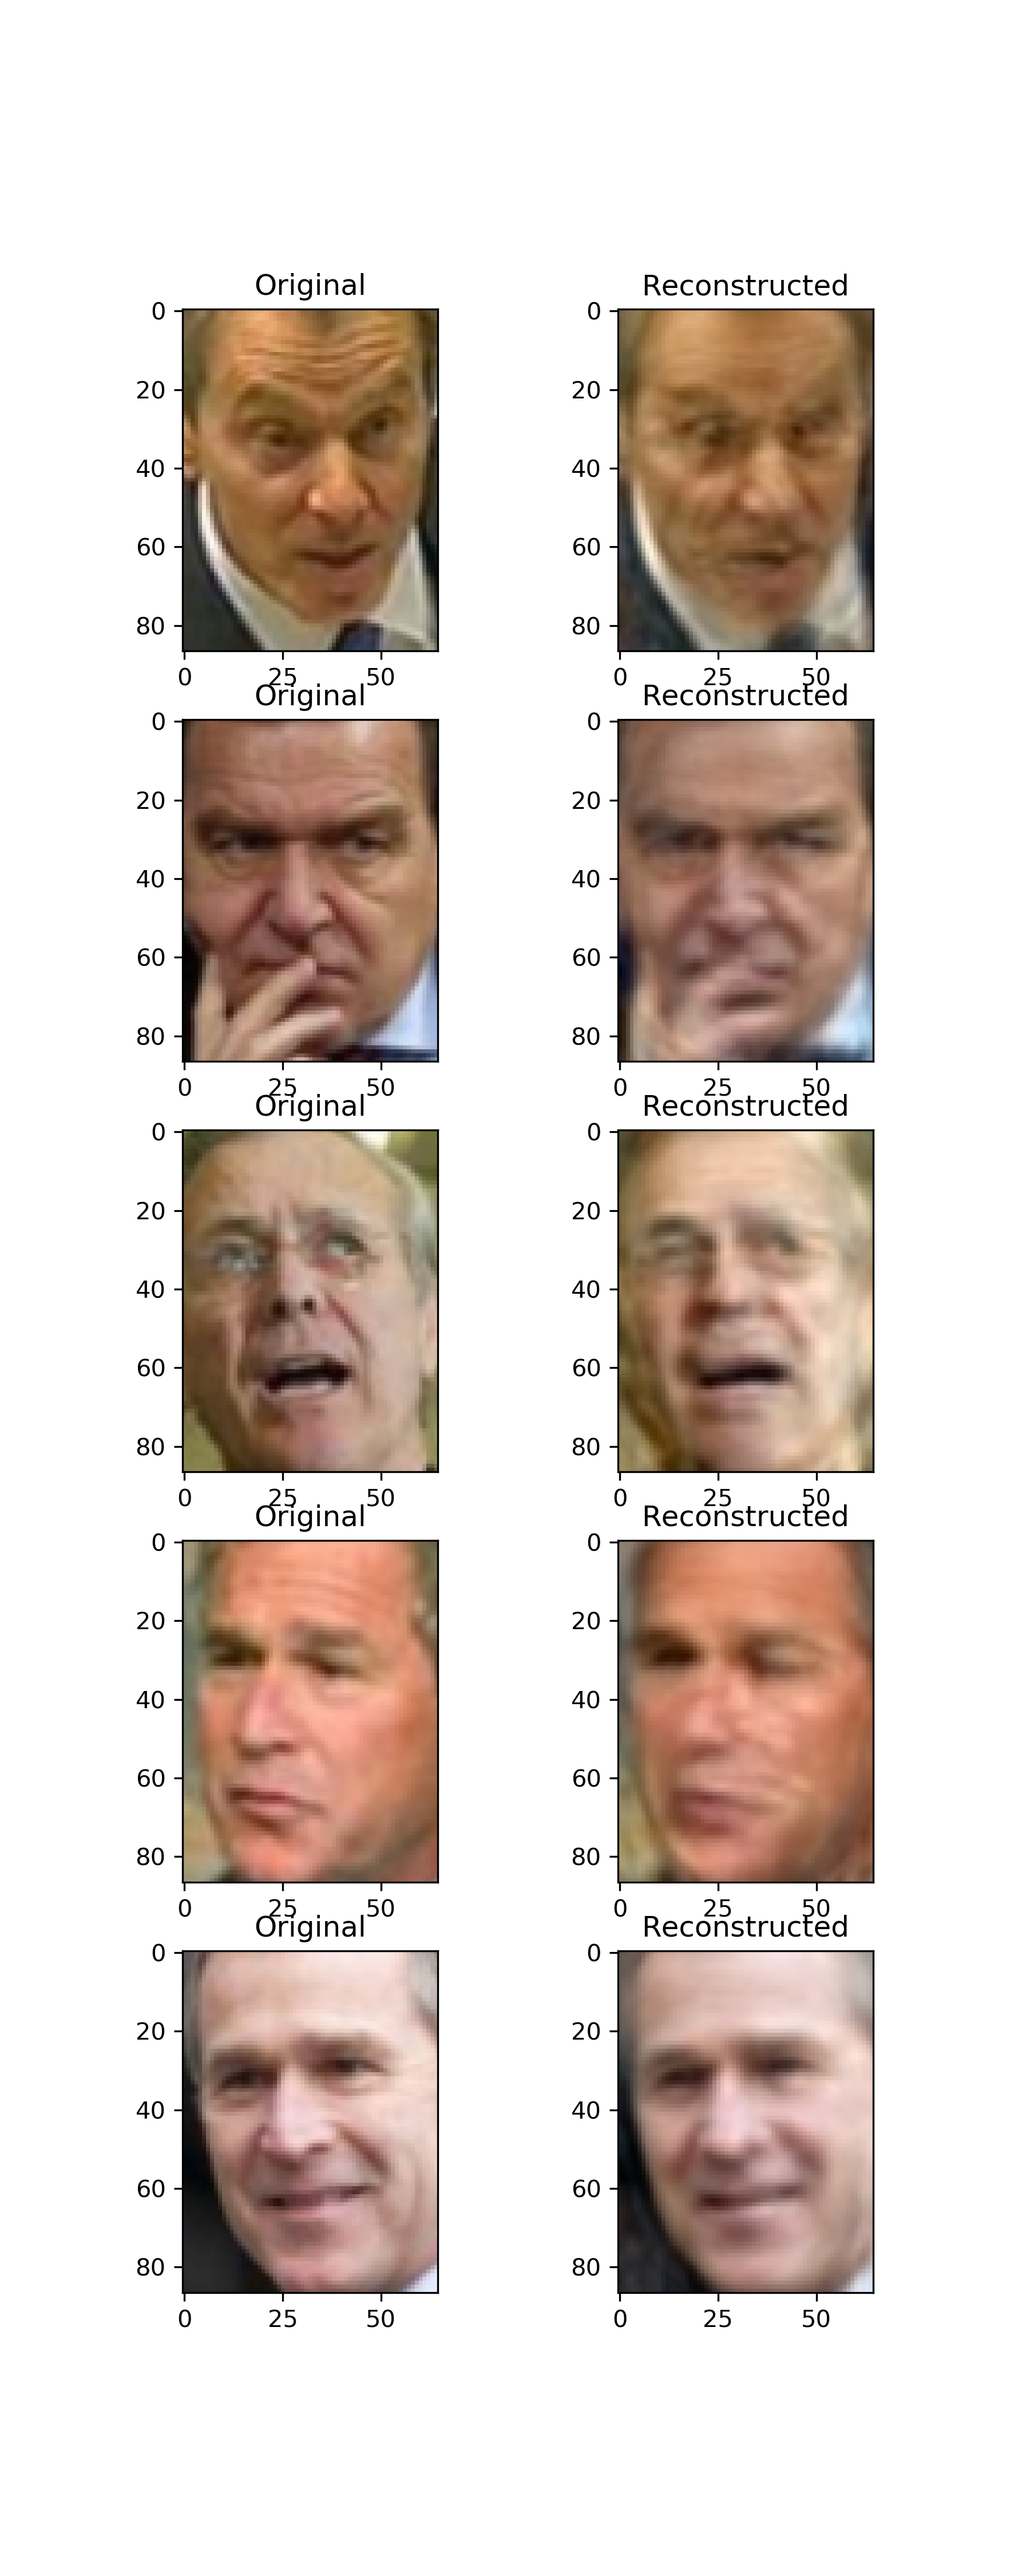

In [282]:
# Test to see how the eigenfaces do at reconstructing the true image
fig,axs = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(6,15)

n_components = len(cumulative_variance_ratio)

for i in range(5):
    X_reconstructed = 0
    counter = 0 
    data_index = i
    for c,l in zip(pca.components_,x[data_index]):
        if counter<n_components:
            X_reconstructed += c*l
        counter += 1
    X_reconstructed += pca.mean_
    X_reconstructed = X_reconstructed.reshape((h,w,z))
    
    min_val = np.min(X_reconstructed)
    max_val = np.max(X_reconstructed)
    X_reconstructed = (X_reconstructed - min_val)/(max_val - min_val) # Normalize rgb values
    
    original = lfw.data[data_index,:].reshape((h,w,z))
    min_val = np.min(original)
    max_val = np.max(original)
    original = (original - min_val)/(max_val - min_val) # Normalize rgb values

    axs[i,0].imshow(original,vmin=0,vmax=255)
    axs[i,0].set_title("Original")
    axs[i,1].imshow(X_reconstructed,vmin=0,vmax=255)
    axs[i,1].set_title("Reconstructed")
plt.show()

In [283]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

c_vals = np.logspace(-11,1)
clf = LogisticRegressionCV(Cs=c_vals, multi_class='multinomial').fit(X_train_pca,y_train)

# Check the value of C
C = clf.C_[0]
print('\nC value:',C)

lm = LogisticRegression(C=C,solver='lbfgs',multi_class='multinomial')
lm.fit(X_train_pca,y_train)

y_test_pred = lm.predict(X_test_pca)
c = confusion_matrix(y_test,y_test_pred)
accuracy = np.diagonal(c).sum()/c.sum()
print("\nConfusion matrix: \n", c)
print("Classification accuracy: ", accuracy)


C value: 5.689866029018281

Confusion matrix: 
 [[ 16   0   4   1   1   0   0   0   0   0   0   0]
 [  1  75   0   5   1   0   0   1   0   0   0   2]
 [  0   1  28   2   2   1   0   0   0   0   0   0]
 [  0   6   5 159   2   0   0   1   1   0   0   1]
 [  0   0   0   1  24   2   2   0   0   1   0   3]
 [  0   2   0   5   3  24   0   0   0   1   0   1]
 [  0   3   0   2   0   0  10   3   1   0   0   2]
 [  0   0   1   0   0   0   0  11   0   0   0   0]
 [  0   1   1   0   1   0   0   0  15   0   0   1]
 [  0   1   0   0   0   1   0   0   0  12   0   0]
 [  0   4   2   3   0   0   0   0   0   0   7   0]
 [  1   1   0   4   2   0   1   0   1   0   0  38]]
Classification accuracy:  0.8135922330097087


Using the color information as part of the PCA seems to have increased accuracy anywhere from ~5-10%.